In [1]:
from __future__ import division

import os

import numpy as np
import skbio
import pandas as pd
import biom`\
`190\=]P09IUYTREAS 

import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sms
import statsmodels.formula.api as smf
import absloute_power.traditional as trad
import absloute_power.utils as ap

from matplotlib import rcParams

from skbio.stats.power import subsample_power
from absloute_power.traditional import calc_ttest_ind

In [2]:
% matplotlib inline

In [3]:
# Displays images inline
%matplotlib inline

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

In [4]:
base_dir = os.path.abspath('../..')
data_dir = os.path.join(base_dir, 'data/yatsunenko/')
map_fp = os.path.join(data_dir, 'GG_100nt_1k_alpha.txt')

In [5]:
map_ = pd.read_csv(map_fp, sep='\t', dtype=str)

map_.set_index('#SampleID', inplace=True)

In [6]:
map_['PD_whole_tree_mean'] = map_.PD_whole_tree_mean.apply(lambda x: float(x))

In [7]:
map_.columns

Index([u'BarcodeSequence', u'LinkerPrimerSequence', u'LAB_PERSON_CONTACT',
       u'TARGET_SUBFRAGMENT', u'ASSIGNED_FROM_GEO', u'LAB_PERSON',
       u'EXPERIMENT_CENTER', u'TITLE', u'RUN_PREFIX', u'AGE', u'AGE_CAT',
       u'INVESTIGATION_TYPE', u'HOST_COMMON_NAME', u'DEPTH', u'HOST_TAXID',
       u'SUBMIT_TO_INSDC', u'COMMON_NAME', u'INCLUDES_TIMESERIES',
       u'LONGITUDE', u'BODY_SITE', u'PROJECT_NAME', u'ELEVATION', u'RUN_DATE',
       u'SEQUENCING_METH', u'COLLECTION_DATE', u'ALTITUDE', u'RUN_LANE',
       u'ENV_BIOME', u'SEX', u'PLATFORM', u'FAMILY_RELATIONSHIP',
       u'STUDY_CENTER', u'COUNTRY', u'FLXDATA_PUBLISHED', u'STUDY_TITLE',
       u'STUDY_ALIAS', u'HOST_SUBJECT_ID', u'ANONYMIZED_NAME', u'TAXON_ID',
       u'SAMPLE_CENTER', u'NEWILLUMINADATAGENERATED',
       u'PRINCIPAL_INVESTIGATOR', u'STUDY_DESCRIPTION', u'PUBLICATION_ALIAS',
       u'AGE_UNIT', u'MIENS_COMPLIANT', u'STUDY_ID',
       u'EXPERIMENT_DESIGN_DESCRIPTION', u'Description_duplicate',
       u'BODY_HABITAT

In [8]:
map_.groupby('AGE_CAT').count().PD_whole_tree_mean

AGE_CAT
adult    223
baby     137
child     59
teen     109
Name: PD_whole_tree_mean, dtype: int64

In [9]:
map_.groupby('AGE_CAT').mean().PD_whole_tree_mean

AGE_CAT
adult    17.549723
baby      9.110906
child    17.863892
teen     15.702317
Name: PD_whole_tree_mean, dtype: float64

In [10]:
map_.groupby(['COUNTRY', 'AGE_CAT']).count().PD_whole_tree_mean

COUNTRY                       AGE_CAT
GAZ:Malawi                    adult       52
                              baby        60
                              teen         2
GAZ:United States of America  adult      136
                              baby        50
                              child       25
                              teen       104
GAZ:Venezuela                 adult       35
                              baby        27
                              child       34
                              teen         3
Name: PD_whole_tree_mean, dtype: int64

In [11]:
mal_map = map_.loc[map_.COUNTRY == 'GAZ:Malawi']

In [12]:
mal_map.groupby('AGE_CAT').mean().PD_whole_tree_mean

AGE_CAT
adult    19.598772
baby      9.354313
teen     12.582929
Name: PD_whole_tree_mean, dtype: float64

In [13]:
adult_map = map_.loc[map_.AGE_CAT =='adult']
agb = adult_map.groupby('COUNTRY')
agb.mean()['PD_whole_tree_mean']

COUNTRY
GAZ:Malawi                      19.598772
GAZ:United States of America    15.892744
GAZ:Venezuela                   20.943970
Name: PD_whole_tree_mean, dtype: float64

In [14]:
agb.count()['PD_whole_tree_mean']

COUNTRY
GAZ:Malawi                       52
GAZ:United States of America    136
GAZ:Venezuela                    35
Name: PD_whole_tree_mean, dtype: int64

In [15]:
adult_map.loc[adult_map.COUNTRY == 'GAZ:United States of America', 'DIET_TYPE'] = 'Western'
adult_map.loc[adult_map.COUNTRY.apply(lambda x: x in {'GAZ:Malawi', 'GAZ:Venezuela'}), 'DIET_TYPE'] = 'NonWestern'

/Users/jwdebelius/.virtualenvs/power_play/lib/python2.7/site-packages/pandas/core/indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jwdebelius/.virtualenvs/power_play/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 1, 5, 4, 6, 2, 3, 7, 5,
       4, 2, 3, 1, 1, 0])

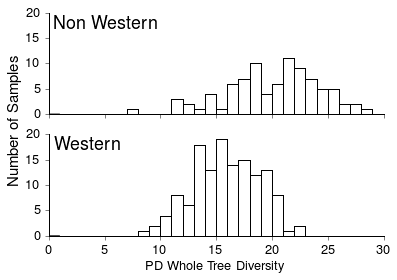

In [74]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(2, 1, 1)
ax2 = fig1.add_subplot(2, 1, 2)

# ax1.hist(adult_map.loc[adult_map.COUNTRY == 'GAZ:Malawi', 'PD_whole_tree_mean'], np.arange(0, 30, 1),
#         facecolor='g') #, normed=True)
ax1.hist(adult_map.loc[adult_map.DIET_TYPE == 'NonWestern', 'PD_whole_tree_mean'], np.arange(0, 30, 1), facecolor='none')
ax2.hist(adult_map.loc[adult_map.DIET_TYPE == 'Western', 'PD_whole_tree_mean'], np.arange(0, 30, 1),
        facecolor='none') #, normed=True)
ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])

ax1.set_xticklabels('')
ax2.set_xticklabels(map(int, ax2.get_xticks()), size=11)
ax2.set_xlabel('PD Whole Tree Diversity', size=13)
ax1.set_yticklabels(ax1.get_yticks(), size=11)
ax2.set_yticklabels(ax2.get_yticks(), size=11)
l = ax1.set_ylabel('Number of Samples', size=15)
l.set_position([0.5, -0.05])
ax1.text(0.5, 17, 'Non Western', size=18)
ax2.text(0.5, 17, 'Western', size=18)

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.get_xaxis().set_tick_params(direction='out')
ax1.get_yaxis().set_tick_params(direction='out')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_yticklabels(map(int, ax1.get_yticks()), size=13)

ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.get_xaxis().set_tick_params(direction='out')
ax2.get_yaxis().set_tick_params(direction='out')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_yticklabels(map(int, ax2.get_yticks()), size=13)
ax2.set_xticklabels(map(int, ax2.get_xticks()), size=13)

fig1.savefig('/Users/jwdebelius/Desktop/hist.pdf')

In [83]:
n_mean = adult_map.loc[adult_map.DIET_TYPE == 'NonWestern', 'PD_whole_tree_mean'].mean()
n_stdv = adult_map.loc[adult_map.DIET_TYPE == 'NonWestern', 'PD_whole_tree_mean'].std()
n_hist = np.histogram(adult_map.loc[adult_map.DIET_TYPE == 'NonWestern', 'PD_whole_tree_mean'], bins=np.arange(0, 30, 1))[0]
w_mean = adult_map.loc[adult_map.DIET_TYPE == 'Western', 'PD_whole_tree_mean'].mean()
w_stdv = adult_map.loc[adult_map.DIET_TYPE == 'Western', 'PD_whole_tree_mean'].std()
w_hist = np.histogram(adult_map.loc[adult_map.DIET_TYPE == 'Western', 'PD_whole_tree_mean'], bins=np.arange(0, 30, 1))[0]

ax1.plot(np.arange(0, 30.1, 0.5), scipy.stats.norm.pdf(np.arange(0, 30.1, 0.5), n_mean, n_stdv)*n_hist.sum(), 'b-')
ax1.plot([n_mean]*2, [0, 8.5], 'r-')
ax1.plot([n_mean-n_stdv, n_mean+n_stdv], [5, 5], '-', color=[0.25, 0.25, 0.25], linewidth=1)

ax2.plot(np.arange(0, 30.1, 0.5), scipy.stats.norm.pdf(np.arange(0, 30.1, 0.5), w_mean, w_stdv)*w_hist.sum(), 'b-')
ax2.plot([w_mean]*2, [0, 18.2], 'r-')
ax2.plot([w_mean-w_stdv, w_mean+w_stdv], [11, 11], '-', color=[0.25, 0.25, 0.25], linewidth=1)
# ax1.plot([])
# ax2.plot([adult_map.loc[adult_map.DIET_TYPE == 'Western', 'PD_whole_tree_mean'].mean()]*2,
# #          [0, 25],
# #          'r-')
fig1
fig1.savefig('/Users/jwdebelius/Desktop/overlay.pdf')

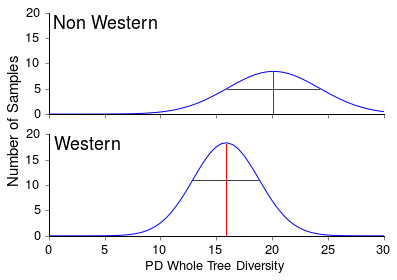

In [85]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(2, 1, 1)
ax2 = fig2.add_subplot(2, 1, 2)

ax1.plot(np.arange(0, 30.1, 0.5), scipy.stats.norm.pdf(np.arange(0, 30.1, 0.5), n_mean, n_stdv)*n_hist.sum(), 'b-')
ax1.plot([n_mean]*2, [0, 8.5], 'r-')
ax1.plot([n_mean-n_stdv, n_mean+n_stdv], [5, 5], '-', color=[0.25, 0.25, 0.25], linewidth=1)

ax2.plot(np.arange(0, 30.1, 0.5), scipy.stats.norm.pdf(np.arange(0, 30.1, 0.5), w_mean, w_stdv)*w_hist.sum(), 'b-')
ax2.plot([w_mean]*2, [0, 18.2], 'r-')
ax2.plot([w_mean-w_stdv, w_mean+w_stdv], [11, 11], '-', color=[0.25, 0.25, 0.25], linewidth=1)

ax1.set_ylim([0, 20])
ax2.set_ylim([0, 20])

ax1.set_xticklabels('')
ax2.set_xticklabels(map(int, ax2.get_xticks()), size=11)
ax2.set_xlabel('PD Whole Tree Diversity', size=13)
ax1.set_yticklabels(ax1.get_yticks(), size=11)
ax2.set_yticklabels(ax2.get_yticks(), size=11)
l = ax1.set_ylabel('Number of Samples', size=15)
l.set_position([0.5, -0.05])
ax1.text(0.5, 17, 'Non Western', size=18)
ax2.text(0.5, 17, 'Western', size=18)

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.get_xaxis().set_tick_params(direction='out')
ax1.get_yaxis().set_tick_params(direction='out')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_yticklabels(map(int, ax1.get_yticks()), size=13)

ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.get_xaxis().set_tick_params(direction='out')
ax2.get_yaxis().set_tick_params(direction='out')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_yticklabels(map(int, ax2.get_yticks()), size=13)
ax2.set_xticklabels(map(int, ax2.get_xticks()), size=13)

fig2.savefig('/Users/jwdebelius/Desktop/outlines.pdf')

In [86]:
scipy.stats.kruskal(adult_map.loc[adult_map.DIET_TYPE == 'NonWestern', 'PD_whole_tree_mean'].values,
                    adult_map.loc[adult_map.DIET_TYPE == 'Western', 'PD_whole_tree_mean'].values,)

KruskalResult(statistic=56.771049152419664, pvalue=4.8962182829374819e-14)

In [93]:
data = [adult_map.loc[adult_map.DIET_TYPE == 'NonWestern', 'PD_whole_tree_mean'].values,
        adult_map.loc[adult_map.DIET_TYPE == 'Western', 'PD_whole_tree_mean'].values]

In [100]:
param1 = calc_ttest_ind(*data, counts=np.arange(2, 36, 0.5))

In [101]:
param1

array([ 0.10675358,  0.15341719,  0.20038508,  0.24669511,  0.29197645,
        0.33600719,  0.37861876,  0.41967605,  0.45907312,  0.4967316 ,
        0.5325987 ,  0.56664496,  0.5988616 ,  0.62925783,  0.65785813,
        0.68469978,  0.70983046,  0.73330618,  0.75518939,  0.77554725,
        0.79445023,  0.81197084,  0.82818256,  0.84315897,  0.85697289,
        0.86969592,  0.8813978 ,  0.8921461 ,  0.90200593,  0.91103961,
        0.91930666,  0.92686358,  0.93376388,  0.94005804,  0.9457935 ,
        0.95101481,  0.95576361,  0.96007873,  0.96399637,  0.96755014,
        0.97077118,  0.97368833,  0.97632825,  0.97871548,  0.98087266,
        0.9828206 ,  0.98457837,  0.9861635 ,  0.98759201,  0.98887857,
        0.99003658,  0.99107828,  0.99201477,  0.99285621,  0.99361187,
        0.99429007,  0.99489846,  0.99544395,  0.99593278,  0.99637062,
        0.99676263,  0.99711341,  0.99742716,  0.99770768,  0.99795835,
        0.99818226,  0.99838221,  0.99856065])

In [102]:
def nonparametric(x):
    x1, x2 = x
    return scipy.stats.mannwhitneyu(x1, x2)[1]

In [103]:
pwr, cnts = subsample_power(nonparametric, 
                            data,
                            min_counts=3,
                            max_counts=36,
                            counts_interval=3,
                            num_runs=5)

In [104]:
eff = ap.z_effect(cnts, pwr)
eff_power1 = ap.z_power(np.arange(2, 36, 0.5), eff.mean())
n = np.sum(np.isnan(eff) == False)
t = scipy.stats.t.ppf(0.975, n-1)
eff_power_l1 = ap.z_power(np.arange(2, 36, 0.5), eff.mean() - eff.std() / np.sqrt(n) * t)
eff_power_u1 = ap.z_power(np.arange(2, 36, 0.5), eff.mean() + eff.std() / np.sqrt(n) * t)

In [107]:
ax = plt.axes()
ax.plot(np.arange(2, 36, 0.5), param1, 'k')
ax.plot(cnts, pwr[0, :], 'o', mfc='none', mec='#e31a1c')
ax.plot(cnts, pwr[1, :], 'o', mfc='none', mec='#e31a1c')
ax.plot(cnts, pwr[2, :], 'o', mfc='none', mec='#e31a1c')
ax.plot(cnts, pwr[3, :], 'o', mfc='none', mec='#e31a1c')
ax.plot(cnts, pwr[4, :], 'o', mfc='none', mec='#e31a1c')
ax.fill_between(np.arange(2, 36, 0.5), eff_power_l1, eff_power_u1, color='#a6cee3')
ax.plot(np.arange(2, 36, 0.5), eff_power1, '#1f78b4')

ax.set_xlim([0, 35])
ax.set_ylim([0, 1])
ax.set_xticklabels(map(int, ax.get_xticks()), size=11)
ax.set_yticklabels(ax.get_yticks(), size=11)

ax.set_xlabel('Sample Size', size=13)
ax.set_ylabel('Power', size=13)
fig = ax.get_figure()
fig.savefig('/Users/jwdebelius/Desktop/curve\
\
=-098`60-=\\][aq;'pdf')

SyntaxError: invalid syntax (<ipython-input-107-71e5f46667ba>, line 19)

In [215]:
cnts

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33])

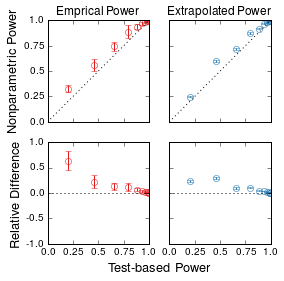

In [344]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
# ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 2, 3)
ax5 = plt.subplot(2, 2, 4)
# ax6 = plt.subplot(2, 3, 6)

fig = ax1.get_figure()
fig.set_size_inches((4, 4))

ax2.errorbar(calc_ttest_ind(*data, counts=cnts),
             ap.z_power(cnts, eff.mean()), 
             yerr=ap.z_power(cnts, eff.mean()) - ap.z_power(cnts, eff.mean() - eff.std()/np.sqrt(n)*t),
             linestyle='none', marker='o', mfc='none', mec='#1f78b4', color='#1f78b4')
ax5.errorbar(calc_ttest_ind(*data, counts=cnts),
             (ap.z_power(cnts, eff.mean()) - calc_ttest_ind(*data, counts=cnts)) / calc_ttest_ind(*data, counts=cnts),
             yerr=(ap.z_power(cnts, eff.mean()) - ap.z_power(cnts, eff.mean() - eff.std()/np.sqrt(n)*t)) / calc_ttest_ind(*data, counts=cnts),
             linestyle='none', marker='o', mfc='none', mec='#1f78b4', color='#1f78b4')

ax1.errorbar(calc_ttest_ind(*data, counts=cnts), 
             pwr.mean(0), 
             yerr=(pwr.std(0) / np.sqrt(2) * scipy.stats.t.ppf(0.975, 2)),
             linestyle='none', marker='o', mfc='none', mec='#e31a1c', color='#e31a1c')
ax4.errorbar(calc_ttest_ind(*data, counts=cnts),
             (pwr.mean(0) - calc_ttest_ind(*data, counts=cnts)) / calc_ttest_ind(*data, counts=cnts),
             yerr=(pwr.std(0)/np.sqrt(2) * scipy.stats.t.ppf(0.975, 2)) / calc_ttest_ind(*data, counts=cnts),
             linestyle='none', marker='o', mfc='none', mec='#e31a1c', color='#e31a1c')

# ax3.errorbar(ap.z_power(cnts, eff.mean()),
#              pwr.mean(0),
#              xerr=ap.z_power(cnts, eff.mean()) - ap.z_power(cnts, eff.mean() - eff.std() / np.sqrt(n) * t),
#              yerr=pwr.std(0) / np.sqrt(2) * scipy.stats.t.ppf(0.975, 2),
#              linestyle='none', marker='o', mfc='none', color='k'
#             )
# ax6.errorbar(ap.z_power(cnts, eff.mean()),
#              (pwr.mean(0) - ap.z_power(cnts, eff.mean())) / ap.z_power(cnts, eff.mean()),
#              xerr=(pwr.mean(0) / np.square(ap.z_power(cnts, eff.mean()))) * (ap.z_power(cnts, eff.mean()) - ap.z_power(cnts, eff.mean() - eff.std() / np.sqrt(n) * t)),
#              yerr=(pwr.std(0) / np.sqrt(2) * scipy.stats.t.ppf(0.975, 2) / ap.z_power(cnts, eff.mean())),
#              linestyle='none', marker='o', mfc='none', color='k'
#              )
ax1.plot([0, 1], [0, 1], 'k:')
ax2.plot([0, 1], [0, 1], 'k:')

ax4.plot([0, 1], [0, 0], 'k:')
# ax4.fill_between([0, 1], [-0.15, -0.15],[0.15, 0.15], color=[0.9, 0.9, 0.9])
# ax5.fill_between([0, 1], [-0.15, -0.15],[0.15, 0.15], color=[0.9, 0.9, 0.9])
ax5.plot([0, 1], [0, 0], 'k:')

ax1.set_xlim([0, 1])
ax2.set_xlim([0, 1])
ax4.set_xlim([0, 1])
ax5.set_xlim([0, 1])

ax1.set_xticks(np.arange(0, 1.1, 0.25))
ax2.set_xticks(np.arange(0, 1.1, 0.25))
ax4.set_xticks(np.arange(0, 1.1, 0.25))
ax5.set_xticks(np.arange(0, 1.1, 0.25))

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])

ax1.set_yticks(np.arange(0, 1.1, 0.25))
ax2.set_yticks(np.arange(0, 1.1, 0.25))

ax4.set_ylim([-1, 1])
ax5.set_ylim([-1, 1])

ax1.set_xticklabels('')
ax2.set_xticklabels('')
ax4.set_xticklabels(ax4.get_xticks(), size=10)
ax5.set_xticklabels(ax4.get_xticks(), size=10)

ax1.set_yticklabels(ax1.get_yticks(), size=10)
ax2.set_yticklabels('')
ax4.set_yticklabels(ax4.get_yticks(), size=10)
ax5.set_yticklabels('')

ax1.set_ylabel('Nonparametric Power', size=13)
ax4.set_ylabel('Relative Difference', size=13)
l = ax4.set_xlabel('Test-based Power', size=13)
l.set_position((1.1, -0.1))

ax1.set_title('Emprical Power')
ax2.set_title('Extrapolated Power')

fig = ax1.get_figure()
fig.savefig('/Users/jwdebelius/Desktop/compare.pdf')

0.049912860277232976